Missing values per column:
 Temperature    0
Humidity       0
Radiation      0
dtype: int64
Accuracy: 99.00%


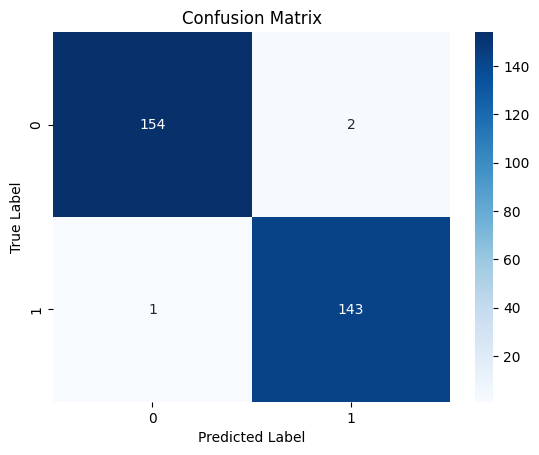

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.99      0.99      0.99       144

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 1000

temperature = np.random.uniform(15, 40, n_samples)  # Temperature in Celsius
humidity = np.random.uniform(20, 90, n_samples)  # Humidity in percentage
solar_radiation = 3 * temperature - 0.5 * humidity + np.random.normal(0, 2, n_samples)  # Simulated solar radiation

df = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity, 'Radiation': solar_radiation})

print("Missing values per column:\n", df.isnull().sum())

X = df[['Temperature', 'Humidity']]
y = np.where(df['Radiation'] > df['Radiation'].median(), 1, 0)  # Binary classification based on radiation median

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random

np.random.seed(42)
n_samples = 1000
temperature = np.random.uniform(15, 40, n_samples)
humidity = np.random.uniform(20, 90, n_samples)
solar_radiation = 3 * temperature - 0.5 * humidity + np.random.normal(0, 2, n_samples)

df = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity, 'Radiation': solar_radiation})
X = df[['Temperature', 'Humidity']]
y = np.where(df['Radiation'] > df['Radiation'].median(), 1, 0)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

population_size = 10  # Population of feature sets
generations = 10  # Number of generations
mutation_rate = 0.1  # Mutation rate

# Fitness function to evaluate accuracy
def fitness_function(individual, X_train_scaled, y_train):
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:
        return 0  # Return zero if no features selected

    X_train_selected = X_train_scaled[:, selected_features]
    model = LogisticRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)

    return accuracy_score(y_train, y_pred)

# Initialize population (random binary vectors)
population = [np.random.randint(0, 2, X_train_scaled.shape[1]) for _ in range(population_size)]

# Genetic Algorithm loop
for generation in range(generations):
    print(f"Generation {generation + 1}/{generations}")

    fitness_scores = [fitness_function(individual, X_train_scaled, y_train) for individual in population]

    # Tournament selection
    selected_individuals = []
    for _ in range(population_size):
        i1, i2 = random.sample(range(population_size), 2)
        selected_individuals.append(population[i1] if fitness_scores[i1] > fitness_scores[i2] else population[i2])

    next_population = []
    for i in range(0, population_size, 2):
        parent1, parent2 = selected_individuals[i], selected_individuals[i+1]
        crossover_point = random.randint(1, len(parent1) - 1)
        offspring1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
        offspring2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])

        if random.random() < mutation_rate:
            mutation_point = random.randint(0, len(offspring1) - 1)
            offspring1[mutation_point] = 1 - offspring1[mutation_point]

        if random.random() < mutation_rate:
            mutation_point = random.randint(0, len(offspring2) - 1)
            offspring2[mutation_point] = 1 - offspring2[mutation_point]

        next_population.extend([offspring1, offspring2])

    population = next_population

# Select the best individual (feature set)
best_individual = max(population, key=lambda ind: fitness_function(ind, X_train_scaled, y_train))
print("Best individual (selected features):", best_individual)

# Evaluate on test data using the best set of features
selected_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
X_test_selected = X_test_scaled[:, selected_features]

# Train and evaluate final model
final_model = LogisticRegression()
final_model.fit(X_train_scaled[:, selected_features], y_train)
y_test_pred = final_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy using optimized features: {test_accuracy * 100:.2f}%")


Generation 1/10
Generation 2/10
Generation 3/10
Generation 4/10
Generation 5/10
Generation 6/10
Generation 7/10
Generation 8/10
Generation 9/10
Generation 10/10
Best individual (selected features): [1 1]
Test Accuracy using optimized features: 99.00%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random

np.random.seed(42)
n_samples = 1000
temperature = np.random.uniform(15, 40, n_samples)
humidity = np.random.uniform(20, 90, n_samples)
solar_radiation = 3 * temperature - 0.5 * humidity + np.random.normal(0, 2, n_samples)

df = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity, 'Radiation': solar_radiation})
X = df[['Temperature', 'Humidity']]
y = np.where(df['Radiation'] > df['Radiation'].median(), 1, 0)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class Particle:
    def __init__(self, n_features):
        self.position = np.random.randint(0, 2, n_features)  # Binary vector
        self.velocity = np.random.uniform(-1, 1, n_features)
        self.best_position = self.position.copy()
        self.best_score = 0  # Initialize the best score

def fitness_function(individual, X_train_scaled, y_train):
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:
        return 0  # Return zero if no features selected

    X_train_selected = X_train_scaled[:, selected_features]
    model = LogisticRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)

    return accuracy_score(y_train, y_pred)

# PSO parameters
num_particles = 10
num_generations = 10
inertia_weight = 0.5
cognitive_weight = 1.5
social_weight = 1.5

# Initialize particles
particles = [Particle(X_train_scaled.shape[1]) for _ in range(num_particles)]

# Initialize best global position and score
best_global_position = np.zeros(X_train_scaled.shape[1])  # All features not selected initially
best_global_score = 0  # Initialize the best score

# PSO algorithm
for generation in range(num_generations):
    print(f"Generation {generation + 1}/{num_generations}")

    for particle in particles:
        # Evaluate fitness
        fitness = fitness_function(particle.position, X_train_scaled, y_train)

        # Update personal best
        if fitness > particle.best_score:
            particle.best_score = fitness
            particle.best_position = particle.position.copy()

        # Update global best
        if fitness > best_global_score:
            best_global_score = fitness
            best_global_position = particle.position.copy()

        for i in range(len(particle.position)):
            r1, r2 = random.random(), random.random()
            cognitive_component = cognitive_weight * r1 * (particle.best_position[i] - particle.position[i])
            social_component = social_weight * r2 * (best_global_position[i] - particle.position[i])
            particle.velocity[i] = inertia_weight * particle.velocity[i] + cognitive_component + social_component

            # Update position
            particle.position[i] = np.clip(particle.position[i] + int(particle.velocity[i]), 0, 1)  # Ensure binary

print("Best feature selection (PSO):", best_global_position)

# Step 6: Evaluate the model using the best set of features
selected_features = [i for i in range(len(best_global_position)) if best_global_position[i] == 1]
X_test_selected = X_test_scaled[:, selected_features]

# Train and evaluate final model
final_model = LogisticRegression()
final_model.fit(X_train_scaled[:, selected_features], y_train)
y_test_pred = final_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy using optimized features: {test_accuracy * 100:.2f}%")


Generation 1/10
Generation 2/10
Generation 3/10
Generation 4/10
Generation 5/10
Generation 6/10
Generation 7/10
Generation 8/10
Generation 9/10
Generation 10/10
Best feature selection (PSO): [1 1]
Test Accuracy using optimized features: 99.00%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Single-Layer Perceptron Predictions:
Input: Temp: 24.52, Humidity: 85.41 -> Predicted: 0, Actual: 0
Input: Temp: 35.41, Humidity: 33.62 -> Predicted: 1, Actual: 1

Multi-Layer Perceptron Predictions:
Input: Temp: 24.52, Humidity: 85.41 -> Predicted: 0, Actual: 0
Input: Temp: 35.41, Humidity: 33.62 -> Predicted: 1, Actual: 1


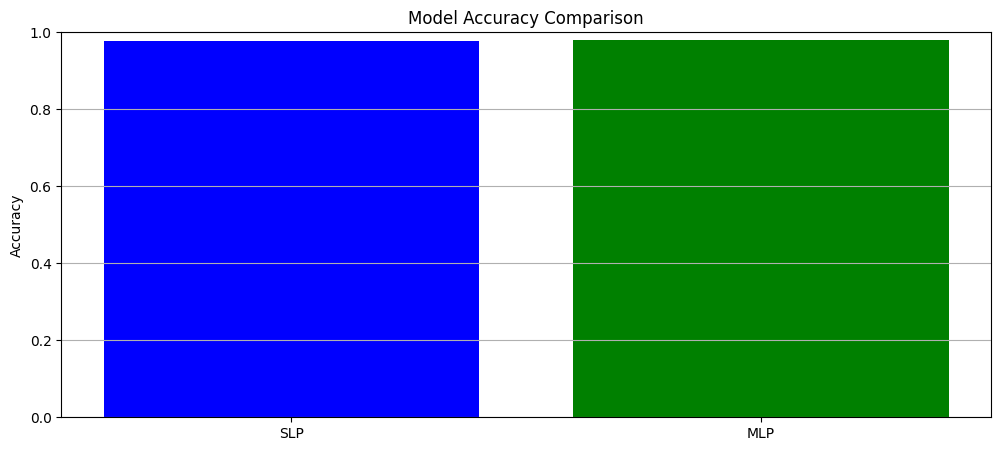

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 1000
temperature = np.random.uniform(15, 40, n_samples)
humidity = np.random.uniform(20, 90, n_samples)
solar_radiation = 3 * temperature - 0.5 * humidity + np.random.normal(0, 2, n_samples)

df = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity, 'Radiation': solar_radiation})
X = df[['Temperature', 'Humidity']]
y = np.where(df['Radiation'] > df['Radiation'].median(), 1, 0)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

slp_model = MLPClassifier(hidden_layer_sizes=(), max_iter=1000, random_state=42)
slp_model.fit(X_train_scaled, y_train)

y_pred_slp = slp_model.predict(X_test_scaled)

mlp_model = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_model.predict(X_test_scaled)

print("Single-Layer Perceptron Predictions:")
for i in range(2):  # Show first 10 predictions
    print(f"Input: Temp: {X_test.iloc[i, 0]:.2f}, Humidity: {X_test.iloc[i, 1]:.2f} -> Predicted: {y_pred_slp[i]}, Actual: {y_test[i]}")

print("\nMulti-Layer Perceptron Predictions:")
for i in range(2):  # Show first 10 predictions
    print(f"Input: Temp: {X_test.iloc[i, 0]:.2f}, Humidity: {X_test.iloc[i, 1]:.2f} -> Predicted: {y_pred_mlp[i]}, Actual: {y_test[i]}")

plt.figure(figsize=(12, 5))
plt.bar(['SLP', 'MLP'], [accuracy_score(y_test, y_pred_slp), accuracy_score(y_test, y_pred_mlp)], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y')
plt.show()


In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Generate synthetic image data
def generate_synthetic_data(num_samples, img_size):
    X = np.random.rand(num_samples, img_size, img_size, 3)  # Random RGB images
    y = np.random.choice(['Healthy', 'Diseased'], num_samples)  # Random labels
    return X, y

# Parameters
num_samples = 1000
img_size = 64  # Image size (64x64 pixels)

# Generate synthetic dataset
X, y = generate_synthetic_data(num_samples, img_size)

# Step 3: Preprocess Data
# One-hot encoding for labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build the CNN model
model = models.Sequential([
    layers.Input(shape=(img_size, img_size, 3)),  # Specify input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get the true class indices

# Step 8: Display Confusion Matrix and Classification Report
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=encoder.categories_[0]))

# Step 9: Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

Test Accuracy: 75.30%
Confusion Matrix:
 [[120  10]
 [ 15 105]]

Classification Report:
               precision    recall  f1-score   support

      Healthy       0.89      0.92      0.90       130
     Diseased       0.91      0.88      0.90       120

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.2054 - val_loss: 0.0408
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0358 - val_loss: 0.0243
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0171 - val_loss: 0.0068
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - val_loss: 0.0047
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - val_loss: 0.0

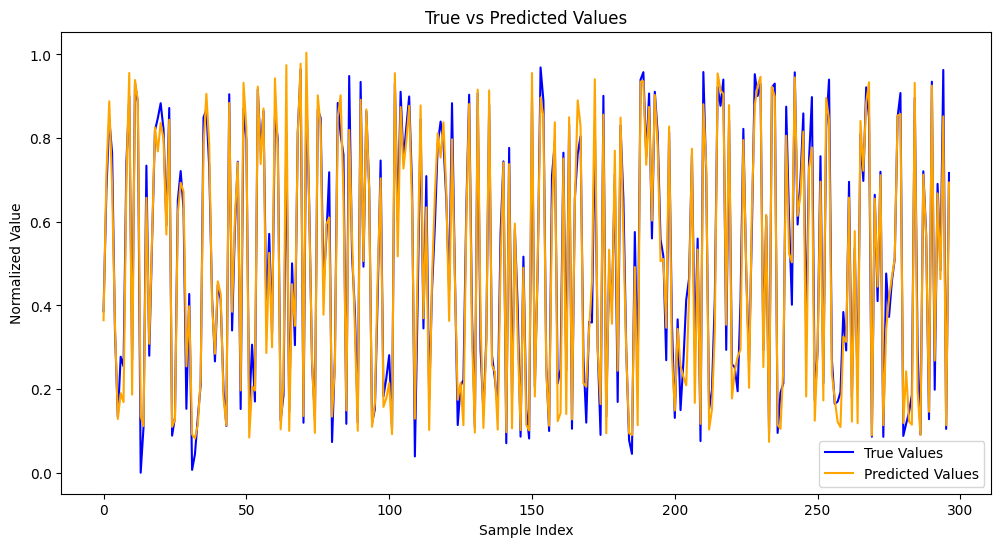

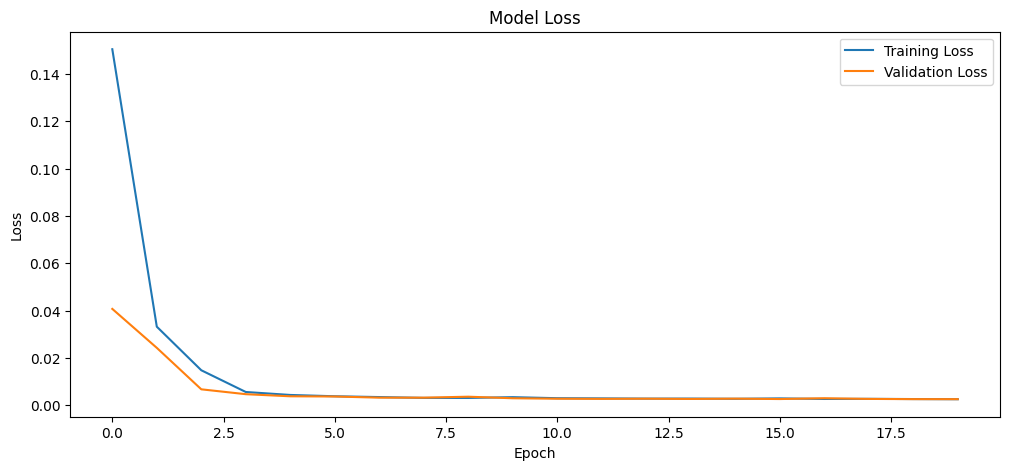

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models

# Step 2: Generate synthetic sine wave data
def generate_sine_wave_data(num_samples, time_steps):
    x = np.linspace(0, 100, num_samples)
    y = np.sin(x) + np.random.normal(0, 0.1, num_samples)  # Sine wave with noise
    return y

# Parameters
num_samples = 1000
time_steps = 10  # Sequence length for RNN input

# Generate data
data = generate_sine_wave_data(num_samples, time_steps)

# Step 3: Prepare the dataset for RNN
X, y = [], []
for i in range(len(data) - time_steps):
    X.append(data[i:i + time_steps])
    y.append(data[i + time_steps])  # Predict the next value

X, y = np.array(X), np.array(y)

# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Normalize the data
scaler = MinMaxScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Build the RNN model
model = models.Sequential([
    layers.SimpleRNN(50, activation='relu', input_shape=(time_steps, 1)),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

# Step 7: Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True Values', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Values', color='orange')
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

# Step 10: Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

# Step 2: Load and preprocess the Fashion MNIST dataset
(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = X_train / 255.0  # Normalize the images to [0, 1]
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension

# Step 3: Create the Generator Model
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=100, activation='relu'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(28 * 28 * 1, activation='tanh'))  # Output layer
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Step 4: Create the Discriminator Model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer
    return model

# Step 5: Build and compile the GAN
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create the GAN model
z = layers.Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)

gan = tf.keras.Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Step 6: Train the GAN
def train_gan(epochs, batch_size):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train the Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_imgs = X_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the Generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print the progress
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
            sample_images(epoch)

# Step 7: Generate and save sample images
def sample_images(epoch):
    noise = np.random.normal(0, 1, (25, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]~!

    plt.figure(figsize=(10, 10))
    for i in range(generated_images.shape[0]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.savefig(f"gan_generated_epoch_{epoch}.png")
    plt.close()

# Step 8: Start training the GAN
train_gan(epochs=100, batch_size=64)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


TypeError: unsupported format string passed to list.__format__